## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Portfolio 1. 

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'Epinions_cleaned_data_portfolio_2') and print out its total length.

In [247]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import math

In [248]:
# import the cleaned data
df=pd.read_csv('files/Epinions_cleaned_data_portfolio_2.csv')

# print data's total length
len(df)

2899

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [249]:
# Part 1
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [250]:
# Part 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2899 non-null   int64  
 1   timestamp    2899 non-null   int64  
 2   review       2899 non-null   object 
 3   item         2899 non-null   object 
 4   rating       2899 non-null   float64
 5   helpfulness  2899 non-null   float64
 6   gender       2899 non-null   object 
 7   category     2899 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.3+ KB


In [251]:
# Part 2
# create a new dataframe that only containts the object columns
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,review,item,gender,category
0,"Finally, Something for (Relatively) Nothing",MyPoints.com,F,Online Stores & Services
1,Shocking!,Sixth Sense,F,Movies
2,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,F,Movies
3,Better Than The First!,Toy Story 2,F,Movies
4,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,F,Movies


In [252]:
ord_enc = OrdinalEncoder()
df["review_code"] = ord_enc.fit_transform(df[["review"]]) #convert reviews to numerical values
df[["review", "review_code"]].head(11) 

,review,review_code
0,"Finally, Something for (Relatively) Nothing",856.0
1,Shocking!,1985.0
2,Simply Shaggadelic!,2006.0
3,Better Than The First!,472.0
4,Blair Witch made me appreciate this,493.0
5,Come here at least once in your life... stay a...,599.0
6,"I joined for the free camera, and stood for no...",1232.0
7,They Should've Fooled the American Public,2415.0
8,A Short List of Things to Remember in NYC,136.0
9,Do you know what a metaphysical can of worms t...,692.0


In [253]:
df["gender_code"] = ord_enc.fit_transform(df[["gender"]]) #convert gender to numerical values
df[["gender", "gender_code"]].head(11)

,gender,gender_code
0,F,0.0
1,F,0.0
2,F,0.0
3,F,0.0
4,F,0.0
5,F,0.0
6,F,0.0
7,F,0.0
8,F,0.0
9,F,0.0


In [254]:
df["category_code"] = ord_enc.fit_transform(df[["category"]]) #convert categories to numerical values
df[["category", "category_code"]].head(11)

,category,category_code
0,Online Stores & Services,6.0
1,Movies,5.0
2,Movies,5.0
3,Movies,5.0
4,Movies,5.0
5,Hotels & Travel,2.0
6,Online Stores & Services,6.0
7,Movies,5.0
8,Hotels & Travel,2.0
9,Movies,5.0


In [255]:
df['rating'].corr(df['helpfulness']) # calculate the correlation between rating and helpfulness

-0.016832209821488656

In [256]:
df['rating'].corr(df['gender_code']) # calculate the correlation between rating and gender

0.01810503901150749

In [257]:
df['rating'].corr(df['category_code']) # calculate the correlation between rating and category

-0.14057638180137577

In [258]:
df['rating'].corr(df['review_code']) # calculate the correlation between rating and review

-0.06207107945825087

In [259]:
# Alternative method to calculate the correlation between helpfulness/gender/category/review and rating
df[['rating','helpfulness','gender_code','category_code', 'review_code']].corr()

,rating,helpfulness,gender_code,category_code,review_code
rating,1.000000,-0.016832,0.018105,-0.140576,-0.062071
helpfulness,-0.016832,1.000000,-0.046627,-0.000189,0.016170
gender_code,0.018105,-0.046627,1.000000,-0.017644,-0.014422
category_code,-0.140576,-0.000189,-0.017644,1.000000,0.012047
review_code,-0.062071,0.016170,-0.014422,0.012047,1.000000


### Explanation on the Correlations

Correlations between two elements can be inferred from their extreme values -1 and 1, indicating perfect linear relationships in which a change in one variable results in a change in the other. Conversely, a coefficient of zero indicates no linear relationship, which implies the other variable has no tendency to increase or decrease as one increases. The table above shows that category is most correlated to rating since its value is closest to -1 (-0.140576). Furthermore, review appears to be the second most closely related element to rating, with a value of -0.062071, followed by gender with a value of 0.018105. Lastly, the least correlated variable with rating is helpfulness, with a value of -0.016832. 

In terms of negative correlation, category, review, and helpfulness have values that are less than zero. Negative coefficients typically signify situations where, as one variable's value rises, the value of the other variable tends to fall. On the other hand, a positive correlation exists between gender and rating, as the correlation coefficient is greater than zero. Positive coefficients show a tendency for the value of one variable to rise as the value of the other variable increases.

Regarding the outcome, the correlation will have an effect on the final prediction result, as better predictive power will be seen when utilizing the most correlated variables, leading to lower mean squared error values, and vice versa. In other words, low MSE and RMSE values suggest greater precision since forecast and actual data are fairly close to one another. The variables with the highest correlation should therefore be employed in this circumstance to improve estimation accuracy and final outcome. My hypothesis can be validated using training and testing linear regression models with feature selection and measuring MSE and RMSE, as is demonstrated in the following section.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [260]:
# Case 1
train, test = train_test_split(df, test_size=0.9, random_state=142)
print(train.shape)
print(test.shape)

(289, 11)
(2610, 11)


In [261]:
# Case 2
train, test = train_test_split(df, test_size=0.1, random_state=142)
print(train.shape)
print(test.shape)

(2609, 11)
(290, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [368]:
# Model A
train, test = train_test_split(df, test_size=0.9, random_state=142)

regA = linear_model.LinearRegression()

X_train = train[["category_code","review_code"]] 
y_train = train["rating"]
X_test = test[["category_code","review_code"]]
y_test = test["rating"]


regA.fit(X_train, y_train)

LinearRegression()

In [370]:
# Model B
train, test = train_test_split(df, test_size=0.9, random_state=142)

regB = linear_model.LinearRegression()

X_train = train[["helpfulness","gender_code"]] 
y_train = train["rating"]
X_test = test[["helpfulness","gender_code"]]
y_test = test["rating"]


regB.fit(X_train, y_train)

LinearRegression()

In [372]:
# Model C
train, test = train_test_split(df, test_size=0.1, random_state=142)

regC = linear_model.LinearRegression()

X_train = train[["category_code","review_code"]] 
y_train = train["rating"]
X_test = test[["category_code","review_code"]]
y_test = test["rating"]


regC.fit(X_train, y_train)

LinearRegression()

In [374]:
# Model D
train, test = train_test_split(df, test_size=0.1, random_state=142)

regD = linear_model.LinearRegression()

X_train = train[["helpfulness","gender_code"]] 
y_train = train["rating"]
X_test = test[["helpfulness","gender_code"]]
y_test = test["rating"]


regD.fit(X_train, y_train)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [369]:
# Model A
predicted_a = regA.predict(X_test)
mse_a = ((np.array(y_test)-predicted_a)**2).sum()/len(y_test)
root_mse_a = np.sqrt(mse_a)

print("MSE:", mse_a)
print("Root MSE:", root_mse_a)

MSE: 1.7661060021271924
Root MSE: 1.3289492097620557


In [371]:
# Model B
predicted_b = regB.predict(X_test)
mse_b = ((np.array(y_test)-predicted_b)**2).sum()/len(y_test)
root_mse_b = np.sqrt(mse_b)

print("MSE:", mse_b)
print("Root MSE:", root_mse_b)

MSE: 1.8142164061736321
Root MSE: 1.3469285081895148


In [373]:
# Model C
predicted_c = regC.predict(X_test)
mse_c = ((np.array(y_test)-predicted_c)**2).sum()/len(y_test)
root_mse_c = np.sqrt(mse_c)

print("MSE:", mse_c)
print("Root MSE:", root_mse_c)

MSE: 1.676161941479957
Root MSE: 1.294666729888413


In [375]:
# Model D
predicted_d = regD.predict(X_test)
mse_d = ((np.array(y_test)-predicted_d)**2).sum()/len(y_test)
root_mse_d = np.sqrt(mse_d)

print("MSE:", mse_d)
print("Root MSE:", root_mse_d)

MSE: 1.7684952380582883
Root MSE: 1.3298478251507908


###  Effects of the Size of Training/Testing Data on the Model Performance (Model A and Model C Comparison)

Based on the testing set performance, Model A appears to have higher MSE (1.766) and RMSE (1.328) since the training size is lower, at 10%, than Model C, at 90%. Prediction accuracy improves because training data is assessed using data that has already been learned, whereas a bigger test dataset may contain more unfamiliar or uncommon data, increasing the likelihood of prediction errors. Therefore, the outcome is significantly influenced by the size of training and testing data.

### Impacts of Feature Selection on the Model Performance (Model C and Model D Comparison)

Model C outperforms Model D in terms of MSE and Root MSE. This is because Model D is trained with variables that are least correlated (helpfulness and gender), whereas Model C is trained with predictor variables that are highly correlated With rating (category and review). This supports the earlier hypothesis stating that the more closely connected the features are, the better the forecast will be, ultimately leading to lower MSE and RMSE.

### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [376]:
model=['Model A', 'Model B', 'Model C', 'Model D']
mse_model=[mse_a, mse_b, mse_c, mse_d]
rmse_model=[root_mse_a, root_mse_b, root_mse_c, root_mse_d]

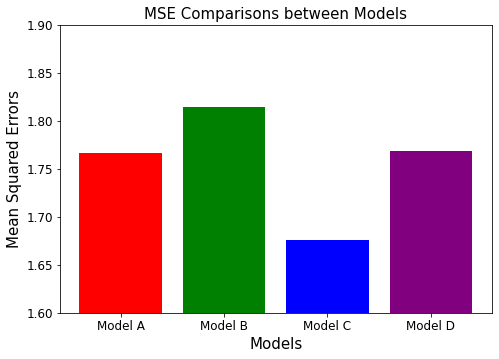

In [384]:
# Display bar chart that compares models' mse
# Due to the similar MSE values (around 1) between the models, the bar charts are intentionally displayed 
# with predetermined y axes scale for better visibility of differences between model.
fig=plt.figure()
plot=fig.add_axes([0,0,1,1])
plot.bar(model,mse_model,color=['red', 'green', 'blue', 'purple'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((1.60,1.90))
plt.title('MSE Comparisons between Models',fontsize=15)
plt.ylabel('Mean Squared Errors',fontsize=15)
plt.xlabel('Models',fontsize=15)
plt.show()

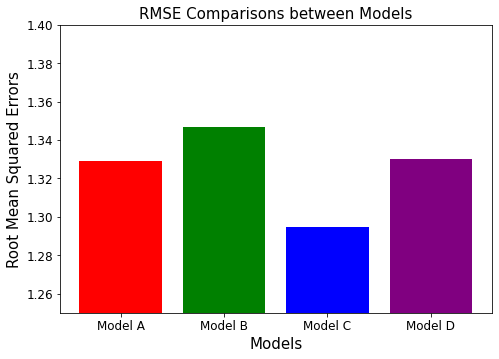

In [385]:
# Display bar chart that compares models' rmse
# Due to the similar RMSE values (around 1) between the models, the bar charts are intentionally displayed 
# with predetermined y axes scale for better visibility of differences between model.
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(model,rmse_model,color=['red', 'green', 'blue', 'purple'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((1.25,1.40))
plt.title('RMSE Comparisons between Models',fontsize=15)
plt.ylabel('Root Mean Squared Errors',fontsize=15)
plt.xlabel('Models',fontsize=15)
plt.show()

### Analysis and Conclusion
According to the bar chart above, Model C, which has been trained at a 90% rate and has primarily correlated variables, performs better than the others. The reason is that the MSE and RMSE of the model are the lowest, indicating the closest estimates to the actual values. Thus, it is evident to suggest that the model with the most correlated features and the most training data will perform better.